<a href="https://colab.research.google.com/github/Aman-1708/Topic_Modelling/blob/master/BERT_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install beautifulsoup4
#!pip install requests
#!pip install gensim
#pip install --upgrade setuptools
#!pip install pyLDAvis
#!pip install nltk.tokenize

import pandas as pd
import nltk; nltk.download('stopwords')
import gensim
import re
import numpy as np
from pprint import pprint
import string
nltk.download('wordnet')
#import pyLDAvis
#import pyLDAvis.sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import string

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer;
from tqdm import tqdm
import string
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import concurrent.futures
import time
#import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
import seaborn as sns
import random
import scipy.stats as stats
from scipy.stats import chi2_contingency
import sklearn.metrics as metrics
import requests 
from bs4 import BeautifulSoup
from urllib.parse import urlparse, urljoin
#import colorama
import re
import scipy
from collections import Counter
from time import time
%matplotlib inline

import torch

import warnings
warnings.filterwarnings("ignore");

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pip install --upgrade git+https://github.com/flairNLP/flair.git

  Cloning https://github.com/flairNLP/flair.git to /tmp/pip-req-build-a8u7y58i
  Running command git clone -q https://github.com/flairNLP/flair.git /tmp/pip-req-build-a8u7y58i
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 573kB 8.0MB/s 
     |████████████████████████████████| 798kB 43.5MB/s 
     |████████████████████████████████| 983kB 39.7MB/s 
     |████████████████████████████████| 256kB 36.8MB/s 
     |████████████████████████████████| 3.7MB 37.6MB/s 
     |████████████████████████████████| 1.0MB 42.3MB/s 
     |████████████████████████████████| 890kB 41.7MB/s 
  Created wheel for flair: filename=flair-0.4.5-cp36-none-any.whl size=141097 sha256=ca68084130e84dcda210dee239e1f28682612ddc91a11aa08e30e15486a3ba65
  Stored in directory: /tmp/pip-ephem-wheel-cache-_12qg3zt/wheels/84/82/73/d2b3b59b7be74ea05f2c6d64132efe27df52daffb47d1dc7bb
Successfully built flair
  Crea

In [0]:
from flair.embeddings import FlairEmbeddings, DocumentPoolEmbeddings, Sentence, BertEmbeddings

In [4]:
# initialise embedding classes
flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')
bert_embedding = BertEmbeddings('bert-base-uncased')
# combine word embedding models
document_embeddings = DocumentPoolEmbeddings([bert_embedding, flair_embedding_backward, flair_embedding_forward])

2020-05-03 16:15:25,220 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-forward--h2048-l1-d0.05-lr30-0.25-20/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmpqhsp4v81


100%|██████████| 73034624/73034624 [00:08<00:00, 8383889.99B/s]

2020-05-03 16:15:35,087 copying /tmp/tmpqhsp4v81 to cache at /root/.flair/embeddings/news-forward-0.4.1.pt
2020-05-03 16:15:35,181 removing temp file /tmp/tmpqhsp4v81


2020-05-03 16:15:54,154 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-backward--h2048-l1-d0.05-lr30-0.25-20/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmpqgie7_wg


100%|██████████| 73034575/73034575 [00:09<00:00, 8063115.14B/s]

2020-05-03 16:16:04,397 copying /tmp/tmpqgie7_wg to cache at /root/.flair/embeddings/news-backward-0.4.1.pt


2020-05-03 16:16:04,489 removing temp file /tmp/tmpqgie7_wg


In [6]:
from google.colab import files
uploaded = files.upload()

Saving Sample_Survey_Data.csv to Sample_Survey_Data.csv


In [7]:
import io
data = io.BytesIO(uploaded['Sample_Survey_Data.csv'])   
data = pd.read_csv(data)
data.head()

,Suggestions,Positive,Negative
0,Some of the questions are repetitive resulting...,0,1
1,I felt like it was repetitive and it would hav...,0,1
2,"had a MRI and later a knee surgery, this two d...",0,1
3,some of the questions were y/n when y/n did no...,0,1
4,I hated this experience. I tried to capture a...,0,1


In [0]:
data=data[['Suggestions']]

In [9]:
data.shape

(1179, 1)

In [0]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", 
             "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 
             'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 
             'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 
             'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
             'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 
             'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 
             'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 
             'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 
             'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 
             'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', 
             "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', 
             "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', 
             "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
             'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 
             'wouldn', "wouldn't","say"]

In [0]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [0]:
tokenizer = RegexpTokenizer(r'\w+')

In [0]:
def preprocess(text):
    data =''
    for token in tokenizer.tokenize(text):
        token=token.lower()
        token=WordNetLemmatizer().lemmatize(token,pos='v')
        if token not in stopwords and len (token)>2 :
            data=data+(token)+' '
    return data

In [0]:
Cleaned_Data = data['Suggestions'].map(preprocess)

In [24]:
Cleaned_Data[0]

'question repetitive result duplicate answer '

In [0]:
df=pd.DataFrame(Cleaned_Data)

In [29]:
df.head()

,Suggestions
0,question repetitive result duplicate answer
1,felt like repetitive would faster talk someone...
2,mri later knee surgery two different instance ...
3,question apply
4,hat experience try capture detail interface fr...


In [0]:
df=df[(df['Suggestions']).str.len()>1]

In [35]:
# set up empty tensor
X = torch.empty(size=(len(df.index), 7168)).cuda()
# fill tensor with embeddings
i=0
for text in tqdm(df['Suggestions']):
    sentence = Sentence(text)
    document_embeddings.embed(sentence)
    embedding = sentence.get_embedding()
    X[i] = embedding
    i += 1


100%|██████████| 1178/1178 [00:59<00:00, 19.74it/s]


In [36]:
X[0]

tensor([ 0.1646, -0.0148, -0.1401,  ..., -0.0009,  0.0132,  0.0247],
       device='cuda:0', grad_fn=<SelectBackward>)

In [0]:
X2 = X.cpu().detach().numpy()
del(X)
torch.cuda.empty_cache()

In [38]:
X2[0]

array([ 0.16456905, -0.01480661, -0.1401069 , ..., -0.00088907,
        0.01319136,  0.02473971], dtype=float32)

In [0]:
#Clustering
from sklearn.decomposition import PCA
pca = PCA(n_components=768)
X_red = pca.fit_transform(X2)

In [0]:
PCA_DATA=pd.DataFrame(X_red)

In [0]:
PCA_DATA.to_csv('PCA_DATA.csv')
files.download('PCA_DATA.csv')

In [0]:
from sklearn.cluster import AgglomerativeClustering
N_CLUSTERS = 5
# WARD CLUSTER
ward = AgglomerativeClustering(n_clusters=N_CLUSTERS,
                               affinity='euclidean',
                               linkage='ward')
pred_ward = ward.fit_predict(X_red)
df['topic'] = pred_ward

In [41]:
df['topic'].value_counts()

0    647
1    252
4    168
3     60
2     51
Name: topic, dtype: int64

In [0]:
#Top terms

from sklearn.feature_extraction.text import TfidfVectorizer
def get_top_words(documents, top_n):
  '''
  function to get top tf-idf words and phrases
  '''
  vectoriser = TfidfVectorizer(ngram_range=(1, 2),
                               max_df=0.5)
  tfidf_matrix = vectoriser.fit_transform(documents)
  feature_names = vectoriser.get_feature_names()
  df_tfidf = pd.DataFrame()
  for doc in range(len(documents)):
    words = []
    scores = []
    feature_index = tfidf_matrix[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
      words.append(w)
      scores.append(s)
    df_temp = pd.DataFrame(data={'word':words, 'score':scores})
    df_temp = df_temp.sort_values('score',ascending=False).head(top_n)
    df_temp['topic'] = doc
    df_tfidf = df_tfidf.append(df_temp)
  return df_tfidf

In [0]:
topic_docs = []
# group text into topic-documents
for topic in range(N_CLUSTERS):
    topic_docs.append(' '.join(df[df['topic']==topic]['Suggestions'].values))
# apply function
df_tfidf = get_top_words(topic_docs, 10)

In [54]:
df_tfidf[df_tfidf['topic']==3].sort_values('score',ascending=False)

,word,score,topic
142,question confuse,0.410330,3
134,confuse question,0.182369,3
133,repetitive question,0.182369,3
185,vague,0.182369,3
164,question vague,0.182369,3
147,question redundant,0.136777,3
178,question repetitive,0.136777,3
176,question seem,0.136777,3
171,redundant question,0.136777,3
165,yes question,0.136777,3


In [58]:
df_tfidf[df_tfidf['topic']==1].sort_values('score',ascending=False)

,word,score,topic
1412,icons,0.213479,1
1266,information icons,0.177900,1
1134,icons work,0.142320,1
1415,browser,0.124530,1
1361,chrome,0.124530,1
1386,load,0.088950,1
1445,pop,0.088950,1
1428,areas,0.088950,1
1434,signature,0.071160,1
1457,check,0.071160,1


In [59]:
df_tfidf[df_tfidf['topic']==0].sort_values('score',ascending=False)

,word,score,topic
10006,also,0.222707,0
9949,visit,0.195829,0
10063,know,0.168950,0
9881,example,0.128501,0
10077,record,0.115193,0
10061,primary,0.114223,0
10092,surgery,0.111353,0
10011,family,0.103674,0
10046,check,0.103674,0
10065,physician,0.099945,0


In [66]:
df.head()

,Suggestions,topic
0,question repetitive result duplicate answer,0
1,felt like repetitive would faster talk someone...,4
2,mri later knee surgery two different instance ...,0
3,question apply,1
4,hat experience try capture detail interface fr...,1


In [0]:
df.reset_index(inplace=True)

In [70]:
#Topic Compactness

topic_centroids = []
for topic in tqdm(range(N_CLUSTERS)):
    X_topic = X_red[df.index[df['topic']==topic]]
    X_mean = np.mean(X_topic, axis=0)
    topic_centroids.append(X_mean)


100%|██████████| 5/5 [00:00<00:00, 342.45it/s]


In [71]:
from scipy.spatial.distance import euclidean
topic_distances = []
for row in tqdm(df.index):
    topic_centroid = topic_centroids[df.iloc[row]['topic']]
    X_row = X_red[row]
    topic_distance = euclidean(topic_centroid, X_row)
    topic_distances.append(topic_distance)
    
df['topic_distance'] = topic_distances


100%|██████████| 1178/1178 [00:00<00:00, 3036.66it/s]


In [72]:
df.head()

,index,Suggestions,topic,topic_distance
0,0,question repetitive result duplicate answer,0,17.975948
1,1,felt like repetitive would faster talk someone...,4,16.015860
2,2,mri later knee surgery two different instance ...,0,15.940362
3,3,question apply,1,22.543333
4,4,hat experience try capture detail interface fr...,1,16.312021


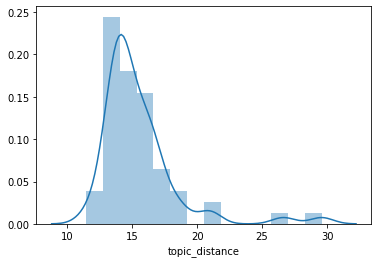

In [80]:
sns.distplot(df[df['topic']==3]['topic_distance'])

In [0]:
#Topic Similarity

from scipy.spatial import distance_matrix
df_dist_matrix = pd.DataFrame(distance_matrix(topic_centroids,
                                              topic_centroids),
                              index=range(N_CLUSTERS),
                              columns=range(N_CLUSTERS))

In [82]:
df_dist_matrix.head()

,0,1,2,3,4
0,0.000000,8.453363,19.245181,12.634516,6.280608
1,8.453363,0.000000,13.553053,10.563915,8.632126
2,19.245181,13.553053,0.000000,15.244542,18.522493
3,12.634516,10.563915,15.244542,0.000000,13.170784
4,6.280608,8.632126,18.522493,13.170784,0.000000
